<a href="https://colab.research.google.com/github/Jakub-Pawinski-PP/WdSI_projekt/blob/main/road_signs_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#podłączenie dysku Google i wskazanie ścieżki do projektu
import os
from google.colab import drive

drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/WdSI_projekt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#instalacja biblioteki Detecto
!pip install detecto

In [11]:
#wyszukanie typu obiektu w pliku .xml
from os import listdir
import glob
import xml.etree.ElementTree as ET

files = glob.glob('road1.xml')

for file in files:

  with open(file, 'r', encoding = "utf-8") as content:

    tree = ET.parse(content)
    
    last_datafile = tree.findall('object')

    for datafile in last_datafile:
      print(datafile.find('name').text)

In [78]:
#import funkcji z biblioteki Detecto, podanie ścieżki treningowej oraz słów kluczowych, trenowanie zbioru
from detecto import core, utils, visualize

# Create dataset from separate XML and image folders
dataset_train = core.Dataset('train/annotations/', 'train/images/')
model = core.Model(['speedlimit', 'crosswalk', 'stop', 'trafficlight'])

model.fit(dataset_train, epochs=10)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.62it/s]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.62it/s]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.62it/s]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.62it/s]


In [79]:
model.save('model_weights.pth')
model = core.Model.load('model_weights.pth', ['speedlimit', 'crosswalk', 'stop', 'trafficlight'])

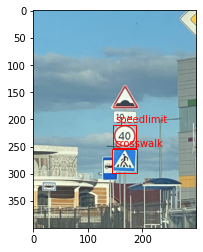

['speedlimit', 'crosswalk']
tensor([[146.3226, 210.3110, 188.2857, 251.8743],
        [144.8909, 254.2865, 189.5893, 297.9698]])
tensor([0.9993, 0.9981])


In [80]:
#wywołanie obrazu ze zbioru treningowego celem sprawdzenia możliwości oznaczenia znaków
image_train = utils.read_image('train/images/road560.png')
predictions_train = model.predict(image_train)

labels_train, boxes_train, scores_train = predictions_train

import numpy as np
#filtr prawdopodobieństwa
train_filter = np.where(scores_train > 0.5)
scores_train_filter = scores_train[train_filter]
boxes_train_filter = boxes_train[train_filter]
num_list_train = list(train_filter[0])
labels_train_filter = []

for i in num_list_train:
  labels_train_filter.append(labels_train[i])
  
visualize.show_labeled_image(image_train, boxes_train_filter, labels_train_filter)

print(labels_train_filter)
print(boxes_train_filter)
print(scores_train_filter)

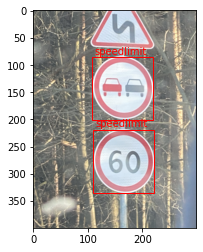

['speedlimit', 'speedlimit']
tensor([[109.7378, 218.8127, 221.7246, 336.0114],
        [107.4796,  85.5870, 220.0656, 200.6951]])
tensor([0.9992, 0.9959])


In [81]:
#wywołanie obrazu ze zbioru testowego celem sprawdzenia możliwości oznaczenia znaków
image_test = utils.read_image('test/images/road666.png')
predictions_test = model.predict(image_test)

labels_test, boxes_test, scores_test = predictions_test

#filtr prawdopodobieństwa
test_filter = np.where(scores_test > 0.9)
scores_test_filter = scores_test[test_filter]
boxes_test_filter = boxes_test[test_filter]
num_list_test = list(test_filter[0])
labels_test_filter = []

for j in num_list_test:
  labels_test_filter.append(labels_test[j])
  
visualize.show_labeled_image(image_test, boxes_test_filter, labels_test_filter)

print(labels_test_filter)
print(boxes_test_filter)
print(scores_test_filter)